In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [62]:
df = pd.read_csv("2020survey_results_public.csv")
schema = pd.read_csv("survey_results_schema.csv")
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [63]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [64]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


## Business Understanding

It seems like more and more people in the world are unhappy with theirs lives. Since most people are working 9-5 jobs, let's see if we can find some features that correlate with job satisfaction.

Below will be multiple features that we can group with job satisfaction to see if we can find some insights.

In [186]:
print(list(schema[schema['Column']=='JobSat']['QuestionText']))
print(list(schema[schema['Column']=='EdLevel']['QuestionText']))
print(list(schema[schema['Column']=='NEWJobHunt']['QuestionText']))
print(list(schema[schema['Column']=='DevType']['QuestionText']))

['How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)']
['Which of the following best describes the highest level of formal education that you’ve completed?']
['In general, what drives you to look for a new job? Select all that apply.']
['Which of the following describe you? Please select all that apply.']


## Data Understanding

In [66]:
df['JobSat'].value_counts().reset_index()

,index,JobSat
0,Very satisfied,14611
1,Slightly satisfied,13930
2,Slightly dissatisfied,7124
3,Neither satisfied nor dissatisfied,5783
4,Very dissatisfied,3746


In [67]:
df['DevType'].value_counts().reset_index()

,index,DevType
0,"Developer, full-stack",4424
1,"Developer, back-end",3086
2,"Developer, back-end;Developer, front-end;Devel...",2227
3,"Developer, back-end;Developer, full-stack",1476
4,"Developer, front-end",1401
...,...,...
8264,Data or business analyst;Data scientist or mac...,1
8265,"Designer;Developer, back-end;Developer, embedd...",1
8266,"Designer;Developer, embedded applications or d...",1
8267,Academic researcher;Data or business analyst;D...,1


In [70]:
df['EdLevel'].value_counts().reset_index()

,index,EdLevel
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",26542
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",13112
2,Some college/university study without earning ...,7239
3,"Secondary school (e.g. American high school, G...",4771
4,"Associate degree (A.A., A.S., etc.)",1843
5,"Other doctoral degree (Ph.D., Ed.D., etc.)",1690
6,Primary/elementary school,941
7,"Professional degree (JD, MD, etc.)",800
8,I never completed any formal education,493


In [71]:
df['NEWJobHunt'].value_counts().reset_index()

,index,NEWJobHunt
0,Curious about other opportunities;Better compe...,1127
1,Curious about other opportunities;Better compe...,1121
2,Better compensation,803
3,Curious about other opportunities;Better compe...,717
4,Better compensation;Better work/life balance;W...,662
...,...,...
2167,Just because;Having a bad day (or week or mont...,1
2168,Just because;Better compensation;Trouble with ...,1
2169,Just because;Having a bad day (or week or mont...,1
2170,Just because;Having a bad day (or week or mont...,1


## Data Preparation

### Why do most people look for new jobs?

Let's first clean up NEWJobHunt and see why most people tend to look for new jobs.

In [83]:
new_job_hunt = list(df.groupby('NEWJobHunt').mean().index)
new_job_hunt

['Better compensation',
 'Better compensation;Better work/life balance',
 'Better compensation;Better work/life balance;Growth or leadership opportunities',
 'Better compensation;Better work/life balance;Growth or leadership opportunities;Looking to relocate',
 'Better compensation;Better work/life balance;Looking to relocate',
 'Better compensation;Better work/life balance;Wanting to work with new technologies',
 'Better compensation;Better work/life balance;Wanting to work with new technologies;Growth or leadership opportunities',
 'Better compensation;Better work/life balance;Wanting to work with new technologies;Growth or leadership opportunities;Looking to relocate',
 'Better compensation;Better work/life balance;Wanting to work with new technologies;Looking to relocate',
 'Better compensation;Growth or leadership opportunities',
 'Better compensation;Growth or leadership opportunities;Looking to relocate',
 'Better compensation;Looking to relocate',
 'Better compensation;Trouble 

In [84]:
def clean_list(my_list):
    '''
    INPUT:
    List - list that you want to clean up
    
    OUTPUT:
    New List - new list that split the strings in the old list and extended into a new one
    '''
    L = []
    for i in my_list:
        new = i.split(';')
        L.extend(list(new))
    return list(set(L))
new_job_hunt_list = clean_list(new_job_hunt)       
new_job_hunt_list

['Wanting to share accomplishments with a wider network',
 'Better compensation',
 'Having a bad day (or week or month) at work',
 'Wanting to work with new technologies',
 'Just because',
 'Looking to relocate',
 'Better work/life balance',
 'Trouble with leadership at my company',
 'Trouble with my direct manager',
 'Growth or leadership opportunities',
 'Curious about other opportunities',
 'Trouble with my teammates']

In [85]:
def count_response(df,my_list):
    '''
    INPUT:
    df - dataframe that you want look through
    new_clean_list - list of strings that you want to search for
    
    OUTPUT:
    new_df - dataframe that consists of responses and the count of how many times they appear
    '''
    d = defaultdict(int)
    df_job_hunt = df['NEWJobHunt'].value_counts().reset_index()
    for i in my_list:
        for j in range(df_job_hunt.shape[0]):
            if i in df_job_hunt['index'][j]:
                d[i] += int(df_job_hunt['NEWJobHunt'][j])
    new_df = pd.DataFrame.from_dict(d,orient='index',columns=['Count of Response'])
    return new_df.sort_values(by='Count of Response',ascending=False)
df_job_hunt = count_response(df,new_job_hunt_list)
df_job_hunt

,Count of Response
Better compensation,29581
Wanting to work with new technologies,24747
Curious about other opportunities,24164
Growth or leadership opportunities,22388
Better work/life balance,20408
Trouble with leadership at my company,11331
Looking to relocate,11116
Having a bad day (or week or month) at work,8579
Trouble with my direct manager,7192
Just because,5214


We can see that people tend to look for new jobs because they want better compensation, to work with new technologies, or other opportunities.

Let's visualize this in a graph.

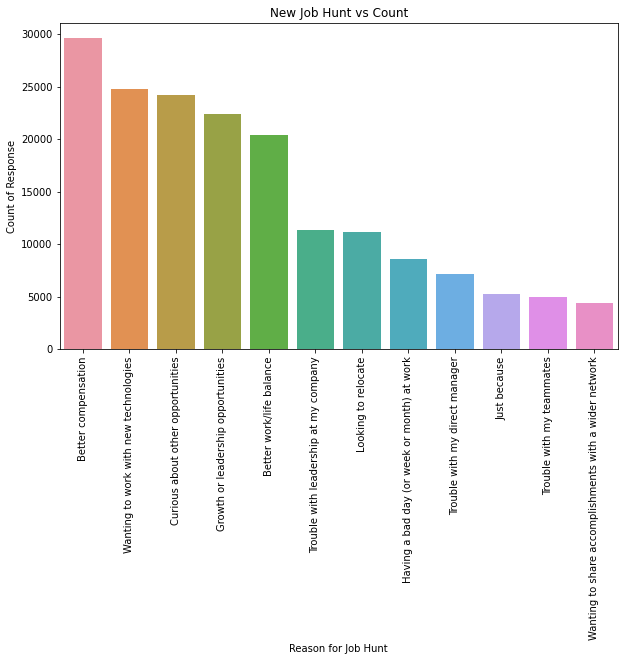

In [200]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
graph_job_hunt = sns.barplot(x=df_job_hunt.index, y=df_job_hunt['Count of Response'], ax=ax)
graph_job_hunt.set_xticklabels(graph_job_hunt.get_xticklabels(), rotation=90)
graph_job_hunt.set(xlabel='Reason for Job Hunt')
graph_job_hunt.set_title("New Job Hunt vs Count");

### Which jobs have the highest job satisfaction?

Let's start by adding a new column to our dataframe that represents the job satisfaction feature as numbers. 

In [81]:
df['JobSat'].value_counts().reset_index()

,index,JobSat
0,Very satisfied,14611
1,Slightly satisfied,13930
2,Slightly dissatisfied,7124
3,Neither satisfied nor dissatisfied,5783
4,Very dissatisfied,3746


In [77]:
df['JobSat_ord'] = df['JobSat'].dropna().apply(lambda x: x.replace('Very satisfied','5').replace('Slightly satisfied','4').replace('Neither satisfied nor dissatisfied','3').replace('Slightly dissatisfied','2').replace('Very dissatisfied','1'))

In [80]:
df['JobSat_ord'].value_counts()

5    14611
4    13930
2     7124
3     5783
1     3746
Name: JobSat_ord, dtype: int64

In [93]:
df['JobSat_ord'] = df['JobSat_ord'].dropna().astype(int)
df['JobSat_ord']

0        4.0
1        1.0
2        NaN
3        2.0
4        NaN
        ... 
64456    NaN
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: JobSat_ord, Length: 64461, dtype: float64

Let's clean up DevType feature

In [82]:
df['DevType'].value_counts().reset_index()

,index,DevType
0,"Developer, full-stack",4424
1,"Developer, back-end",3086
2,"Developer, back-end;Developer, front-end;Devel...",2227
3,"Developer, back-end;Developer, full-stack",1476
4,"Developer, front-end",1401
...,...,...
8264,Data or business analyst;Data scientist or mac...,1
8265,"Designer;Developer, back-end;Developer, embedd...",1
8266,"Designer;Developer, embedded applications or d...",1
8267,Academic researcher;Data or business analyst;D...,1


In [87]:
dev_type = list(df.groupby('DevType').mean().index)

In [88]:
clean_dev_type_list = clean_list(dev_type)
clean_dev_type_list

['Designer',
 'Engineering manager',
 'Developer, QA or test',
 'Academic researcher',
 'Developer, desktop or enterprise applications',
 'Product manager',
 'Developer, game or graphics',
 'Developer, full-stack',
 'Senior executive/VP',
 'Marketing or sales professional',
 'Developer, embedded applications or devices',
 'Scientist',
 'Engineer, data',
 'Developer, back-end',
 'System administrator',
 'Engineer, site reliability',
 'Developer, front-end',
 'Database administrator',
 'Developer, mobile',
 'DevOps specialist',
 'Data or business analyst',
 'Educator',
 'Data scientist or machine learning specialist']

In [97]:
df.groupby('DevType')['JobSat_ord'].value_counts()

DevType               JobSat_ord
Academic researcher   5.0           77
                      4.0           45
                      1.0           23
                      3.0           18
                      2.0           15
                                    ..
System administrator  5.0           33
                      4.0           32
                      2.0           26
                      3.0           15
                      1.0           10
Name: JobSat_ord, Length: 11398, dtype: int64

In [201]:
def count_response_job_sat(df,my_list):
    '''
    INPUT:
    df - dataframe
    my_list - list of unique developers
    
    OUTPUT
    new_df - outputs a new dataframe that has the average job satisfaction score
    '''
    d = defaultdict(int)
    k = defaultdict(int)
    
    df_job_sat = df[['DevType','JobSat_ord']].dropna().reset_index()
    df_dev_type = df_job_sat.drop('JobSat_ord',axis=1)
    df_dev_type = df_dev_type['DevType'].value_counts().reset_index()
    for i in my_list:
        for j in range(df_job_sat.shape[0]):
            if i in df_job_sat['DevType'][j]:
                d[i] += int(df_job_sat['JobSat_ord'][j])
            
    for i in my_list:
        for j in range(df_dev_type.shape[0]):
            if i in df_dev_type['index'][j]:
                k[i] += int(df_dev_type['DevType'][j])
                
    ds = [d, k]
    s = {}
    for t in d.keys():
          s[t] = list(s[t] for s in ds)
                
    df_new = pd.DataFrame.from_dict(s,orient='index', columns=['Number of DevTypes','Sum of JobSat_ord'])
    df_new['Average Job Satisfaction'] = df_new['Number of DevTypes']/df_new['Sum of JobSat_ord']
    df_new = df_new.sort_values(by='Average Job Satisfaction',ascending=False)
    return df_new.drop(['Number of DevTypes','Sum of JobSat_ord'],axis=1)

df_dev_jobsat = count_response_job_sat(df,clean_dev_type_list)
df_dev_jobsat

,Average Job Satisfaction
Senior executive/VP,3.907556
Scientist,3.763085
Marketing or sales professional,3.741273
Data scientist or machine learning specialist,3.730769
Engineering manager,3.703642
DevOps specialist,3.683643
Educator,3.681600
"Engineer, data",3.671091
Product manager,3.663251
"Engineer, site reliability",3.661046


We can see that Executives and VP have the highest job satisfaction. Let's visualize our findings using a barplot.

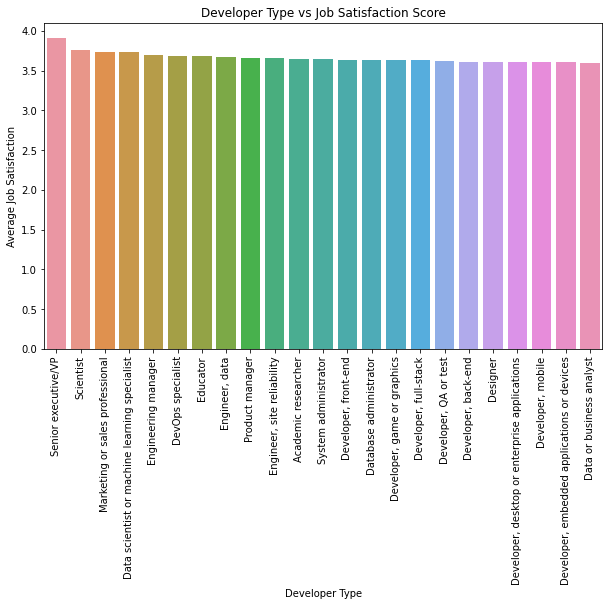

In [202]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
graph_job_sat_devtype = sns.barplot(x=df_dev_jobsat.index, y=df_dev_jobsat['Average Job Satisfaction'],ax=ax)
graph_job_sat_devtype.set_xticklabels(graph_job_sat_devtype.get_xticklabels(), rotation=90)
graph_job_sat_devtype.set(xlabel='Developer Type')
graph_job_sat_devtype.set_title("Developer Type vs Job Satisfaction Score");


### Does education level have an impact on job satisfaction?

In [204]:
df["EdLevel"].value_counts().reset_index()

,index,EdLevel
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",26542
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",13112
2,Some college/university study without earning ...,7239
3,"Secondary school (e.g. American high school, G...",4771
4,"Associate degree (A.A., A.S., etc.)",1843
5,"Other doctoral degree (Ph.D., Ed.D., etc.)",1690
6,Primary/elementary school,941
7,"Professional degree (JD, MD, etc.)",800
8,I never completed any formal education,493


In [212]:
df.groupby(['EdLevel'])['JobSat_ord'].mean().reset_index().sort_values(by='JobSat_ord',ascending=False)

,EdLevel,JobSat_ord
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",3.867161
7,"Secondary school (e.g. American high school, G...",3.669862
8,Some college/university study without earning ...,3.651887
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3.648387
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3.608650
0,"Associate degree (A.A., A.S., etc.)",3.606145
5,Primary/elementary school,3.516746
6,"Professional degree (JD, MD, etc.)",3.485937
2,I never completed any formal education,3.252830


In [219]:
pd.pivot_table(df,index='EdLevel',values='JobSat_ord').sort_values(by='JobSat_ord',ascending=False)

,JobSat_ord
EdLevel,
"Other doctoral degree (Ph.D., Ed.D., etc.)",3.867161
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",3.669862
Some college/university study without earning a degree,3.651887
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3.648387
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3.608650
"Associate degree (A.A., A.S., etc.)",3.606145
Primary/elementary school,3.516746
"Professional degree (JD, MD, etc.)",3.485937
I never completed any formal education,3.252830


## Evaluation

### Why do most people look for new jobs?

We noticed that people tend to look for new jobs because they are either unsatisfied with their income, they want to work with new technologies, or they might just be bored and want to explore new opportunities.

### Which jobs have the highest job satisfaction?

This was an important question that I had and wanted to know if there was any differene in some jobs having more job satisfaction than others. However, I noticed that there wasn't any huge difference between average job satisfaction, but executives and scientists were at the top of the list.

### Does education level have an impact on job satisfaction?

From my findings I saw that individuals who had a doctoral degree had on average the highest job satisifaction. This is probably due to the fact that people going into these higher degrees must have passion for what they do, otherwise they wouldn't do it.